fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.
ls: cannot access 'german-traffic-sign': No such file or directory
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_10 (MaxPooli

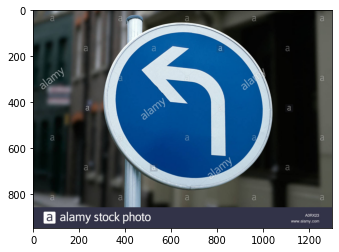

In [9]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs
!ls german-traffic-sign
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

np.random.seed(0)
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = valid_data['features'], valid_data['labels']

assert(X_train.shape[0] == y_train.shape[0]), 'The number of Images is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of Images is not equal to the number of labels'
assert(X_val.shape[0] == y_val.shape[0]), 'The number of Images is not equal to the number of labels'
assert(X_train.shape[1:] == (32, 32, 3)), 'The dimensions of the image is not 32*32*3'
assert(X_test.shape[1:] == (32, 32, 3)), 'The dimensions of the image is not 32*32*3'
assert(X_val.shape[1:] == (32, 32, 3)), 'The dimensions of the image is not 32*32*3'

data = pd.read_csv('german-traffic-signs/signnames.csv')
# print(data.head())

# num_of_samples=[]

# cols = 5
# num_classes = 43

# fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
# fig.tight_layout()

# for i in range(cols):
#     for j, row in data.iterrows():
#       x_selected = X_train[y_train == j]
#       axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
#       axs[j][i].axis("off")
#       if i == 2:
#         axs[j][i].set_title(str(j) + " - " + row["SignName"])
#         num_of_samples.append(len(x_selected))

import cv2

# img = plt.imshow(X_train[1000])
# print(X_train[1000].shape)

def gray(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

# img = gray(X_train[1000])
# plt.imshow(img, cmap=plt.get_cmap('gray'))
# plt.axis('off')
# print(img.shape)

def equalize_img(img):
  eq = cv2.equalizeHist(img)
  return eq

# equal = equalize_img(img)
# plt.imshow(img, cmap=plt.get_cmap('gray'))
# plt.axis('off')
# print(img.shape)

def preprocessing(img):
  img = gray(img)
  img = equalize_img(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

# plt.imshow(X_train[random.randint(0, len(X_train)-1)])
# plt.axis('off')
# print(X_train.shape)

X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)


y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
model = modified_model()
print(model.summary())



def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img





import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
# plt.imshow(img, cmap = plt.get_cmap('gray'))
img = img.reshape(1, 32, 32, 1)

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

# fig, axs = plt.subplots(1, 15, figsize=(20, 5))
# fig.tight_layout()
# for i in range(15):
#     axs[i].imshow(X_batch[i].reshape(32, 32))
#     axs[i].axis("off")


print("predicted sign: "+ str(model.predict_classes(img)))




